# 📌 What is Feature Scaling?

**Feature Scaling** is a data preprocessing technique used to bring all input features (variables) to a similar range or scale.

It is mainly used in **Machine Learning** when features have different units or magnitudes.

---

## 🎯 Why Feature Scaling is Needed?

Imagine this dataset:

| Age (years) | Salary (₹) |
|-------------|------------|
| 25          | 250000     |
| 30          | 500000     |
| 35          | 750000     |

- **Age** range → 25 to 35  
- **Salary** range → 2,50,000 to 7,50,000  

Clearly, salary values are much larger than age.

If we apply algorithms like:

- KNN
- K-Means
- SVM
- Linear Regression (Gradient Descent)
- Neural Networks

The model may give **more importance to Salary** because its magnitude is larger.

👉 Feature scaling ensures **equal importance** to all features.

---

# 🔥 Types of Feature Scaling

There are mainly **2 important methods**:

---

# 1️⃣ Min-Max Scaling (Normalization)

### 📌 Formula:

X_scaled = (X - X_min) / (X_max - X_min)

It scales data between **0 and 1**.

---

### ✅ Example

Suppose:

Age values = 25, 30, 35  

Here:
- Min = 25  
- Max = 35  

For Age = 30:

(30 - 25) / (35 - 25) = 5 / 10 = 0.5

Scaled values:

| Original Age | Scaled Age |
|--------------|------------|
| 25           | 0.0        |
| 30           | 0.5        |
| 35           | 1.0        |

---

### 📌 When to Use?

- When data does not contain many outliers
- When we need bounded values (like neural networks)

---

# 2️⃣ Standardization (Z-Score Scaling)

Also called **Standard Scaling**.

### 📌 Formula:

X_scaled = (X - μ) / σ

Where:
- μ = mean
- σ = standard deviation

It transforms data so that:
- Mean = 0
- Standard deviation = 1

---

### ✅ Example

Suppose Age values:

25, 30, 35  

Mean = 30  
Std deviation ≈ 4.08  

For Age = 35:

(35 - 30) / 4.08 ≈ 1.22

So scaled value ≈ 1.22

---

### 📌 When to Use?

- When data has outliers
- When algorithm assumes normal distribution
- Best for:
  - Linear Regression
  - Logistic Regression
  - SVM
  - PCA

---

# ⚠️ When Feature Scaling is NOT Required

You **don’t need scaling** in:

- Decision Tree
- Random Forest
- XGBoost
- LightGBM

Because tree-based models split based on feature importance, not distance.

---

# 🧠 Why Scaling Helps (Mathematical Intuition)

Suppose we calculate Euclidean distance in KNN:

Distance = √((x₁ - y₁)² + (x₂ - y₂)²)

If one feature has very large values, it will dominate the distance calculation.

Scaling prevents this dominance.

---

# 💻 Python Example

```python
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

data = pd.DataFrame({
    'Age': [25, 30, 35],
    'Salary': [250000, 500000, 750000]
})

# Min-Max Scaling
minmax = MinMaxScaler()
scaled_minmax = minmax.fit_transform(data)

# Standard Scaling
standard = StandardScaler()
scaled_standard = standard.fit_transform(data)

print("Min-Max Scaled:\n", scaled_minmax)
print("\nStandard Scaled:\n", scaled_standard)
```

---

# 🔎 Comparison

| Method | Range | Affected by Outliers? | Best For |
|--------|-------|----------------------|----------|
| Min-Max | 0 to 1 | Yes | Neural Networks |
| Standardization | Mean=0, Std=1 | Less | Linear Models, SVM |

---

# 🚀 Final Understanding

Feature Scaling:

✔ Makes training faster  
✔ Prevents bias toward large features  
✔ Improves convergence of gradient descent  
✔ Essential for distance-based models  


In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [25]:
df =  pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# df.iloc[row_selection, column_selection]
# syntax

df = df.iloc[:,[2,3,4]]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [27]:
df.sample(4)

,Age,EstimatedSalary,Purchased
243,56,104000,1
86,24,55000,0
341,35,75000,0
265,42,108000,1


In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # creating an instance of the standard scaler class

 
scaler.fit(x_train) # fittng the training data to the scaler instance and calculating the mean and the standard deviation of the training data

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# after scaling the data it returns a numpy array instead of a dataframe so we need to convert it back to a dataframe

x_train_scaled

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [34]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns) # converting the scaled training data back to a dataframe and assigning the column names of the original training data to the scaled training data
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
x_train_scaled.head() # the values of the features are now scaled and have a mean of 0 and a standard deviation of 1

,Age,EstimatedSalary
0,-1.066752,-0.386344
1,0.797535,-1.229939
2,0.110692,1.853544
3,0.601294,-0.909955
4,1.876859,-1.288118


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

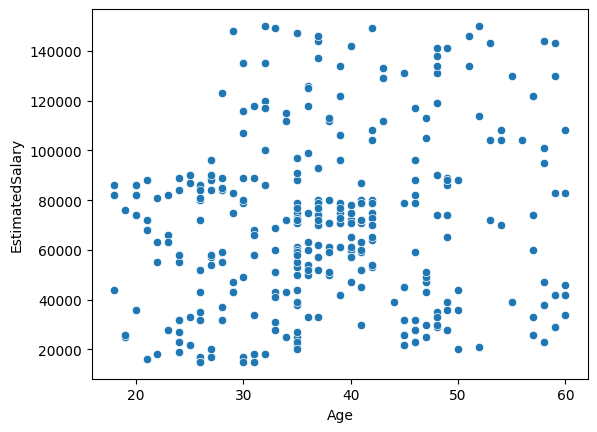

In [40]:
import seaborn as sns

sns.scatterplot(x=x_train['Age'],y= x_train['EstimatedSalary'])



<Axes: xlabel='Age', ylabel='EstimatedSalary'>

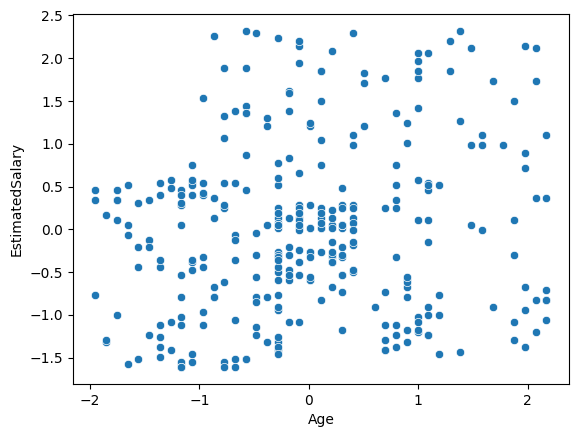

In [41]:
sns.scatterplot(x = x_train_scaled['Age'], y = x_train_scaled['EstimatedSalary'])

In [ ]:
# what we have infered from is the graph may appear the same but the value on the axis are different because the values of the features are now scaled and have a mean of 0 and a standard deviation of 1